In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns


In [16]:
file_path = "/mnt/data/train.csv"
df = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\Python EDA PROJECT\train.csv")

# Display basic info and first few rows
df_info = df.info()
df_head = df.head()
df_shape = df.shape

df_info, df_head, df_shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

In [17]:
# Step 1: Identify missing values
missing_values = df.isnull().sum()

# Step 2: Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Step 3: Standardize text values
df_cleaned['Sex'] = df_cleaned['Sex'].str.strip().str.lower()
df_cleaned['Embarked'] = df_cleaned['Embarked'].str.strip().str.upper()

# Step 4: Convert date formats (no date column present, so skipping this step)

# Step 5: Rename columns to be clean and uniform
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 6: Check and fix data types
# Convert 'age' to integer after handling missing values (we'll fill missing with median)
df_cleaned['age'] = df_cleaned['age'].fillna(df_cleaned['age'].median()).astype(int)

# Embarked still has 2 missing values, fill with mode
df_cleaned['embarked'] = df_cleaned['embarked'].fillna(df_cleaned['embarked'].mode()[0])

# Cabin has too many missing values — drop the column
df_cleaned = df_cleaned.drop(columns=['cabin'])

# Final check of data types and missing values
final_missing = df_cleaned.isnull().sum()
final_dtypes = df_cleaned.dtypes

final_missing, final_dtypes, df_cleaned.head()


(passengerid    0
 survived       0
 pclass         0
 name           0
 sex            0
 age            0
 sibsp          0
 parch          0
 ticket         0
 fare           0
 embarked       0
 dtype: int64,
 passengerid      int64
 survived         int64
 pclass           int64
 name            object
 sex             object
 age              int64
 sibsp            int64
 parch            int64
 ticket          object
 fare           float64
 embarked        object
 dtype: object,
    passengerid  survived  pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 name     sex  age  sibsp  \
 0                            Braund, Mr. Owen Harris    male   22      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
 2                             Heikkinen, Miss. Lain

In [18]:
df_cleaned.describe(include='all')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.345679,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.028212,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [19]:
# Display dataset info
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    int64  
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [40]:
# Value counts for Survived column (0 = No, 1 = Yes)
df_cleaned['survived'].value_counts()

# Value counts for Sex
df_cleaned['sex'].value_counts()

# Value counts for Embarked
df_cleaned['embarked'].value_counts()

# Value counts for Pclass (Passenger Class)
df_cleaned['pclass'].value_counts()


pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [24]:
df_cleaned['sex'].value_counts()



sex
male      577
female    314
Name: count, dtype: int64

In [25]:
df_cleaned['embarked'].value_counts()


embarked
S    646
C    168
Q     77
Name: count, dtype: int64

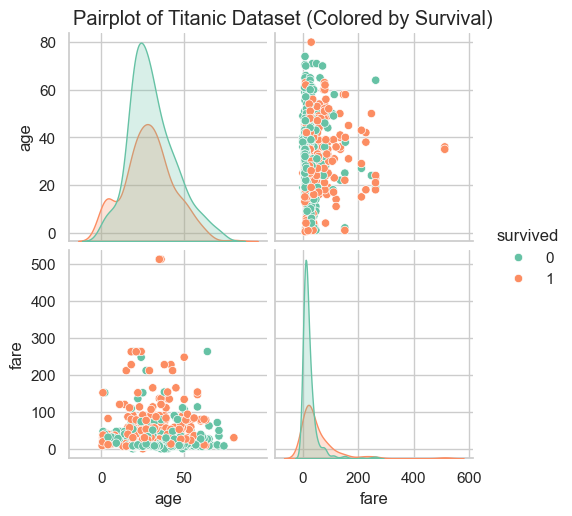

In [41]:

df = sns.load_dataset('titanic')
sns.pairplot(df[['age', 'fare', 'survived']].dropna(), hue='survived', palette='Set2')
plt.suptitle("Pairplot of Titanic Dataset (Colored by Survival)", y=1.02)
plt.show()

In [42]:
correlation_matrix = df_cleaned.corr(numeric_only=True)


In [43]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_cleaned.corr(numeric_only=True)



<Figure size 1000x600 with 0 Axes>

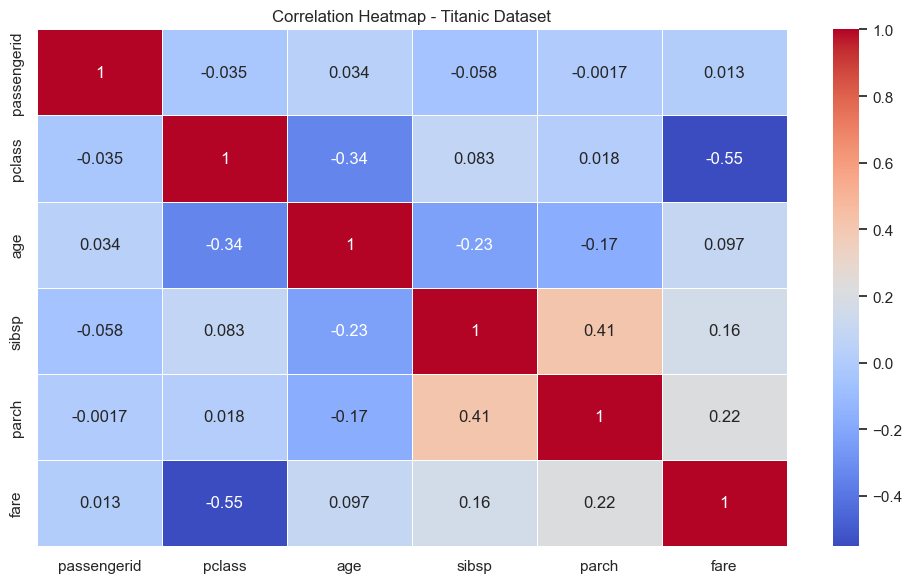

In [38]:
# Heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Title and layout
plt.title("Correlation Heatmap - Titanic Dataset")
plt.tight_layout()
plt.show()

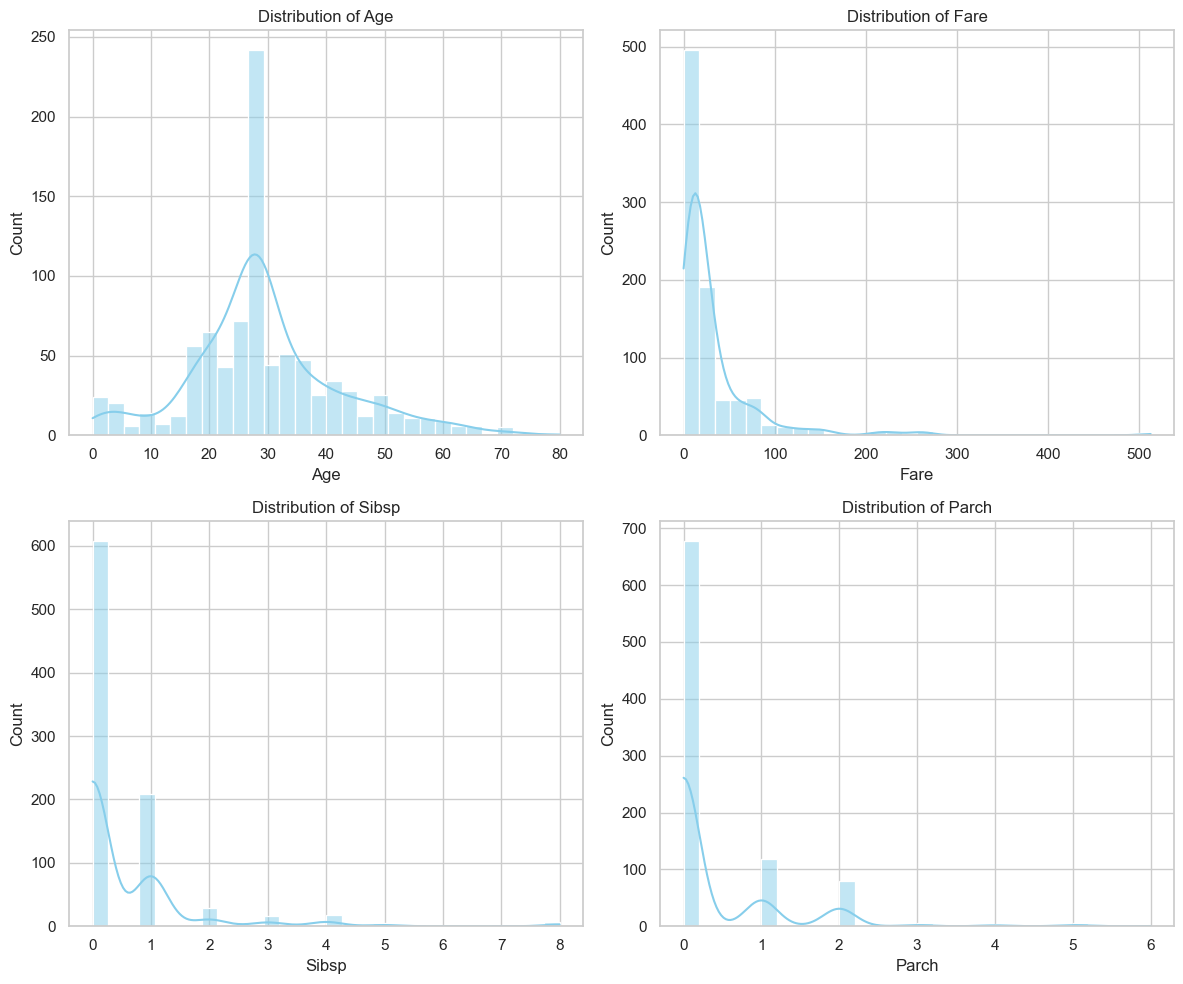

In [44]:
sns.set(style='whitegrid')

# List of numeric columns to plot
numeric_cols = ['age', 'fare', 'sibsp', 'parch']

# Set figure size and layout
plt.figure(figsize=(12, 10))

# Plot each histogram in a subplot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_cleaned, x=col, bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=df_cleaned, palette='Set2')
plt.title("Boxplot of Age by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=df_cleaned, palette='Pastel1')
plt.title("Boxplot of Age by Gender")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()
✅ 4. Mu

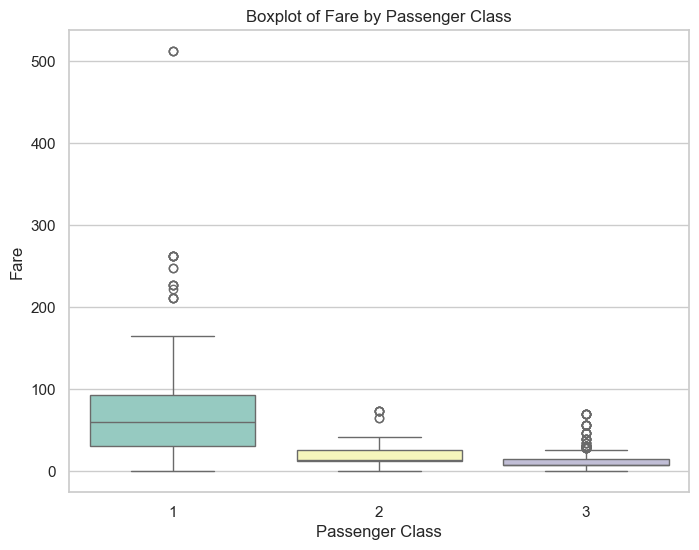

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', hue='pclass', data=df_cleaned, palette='Set3', legend=False)
plt.title("Boxplot of Fare by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

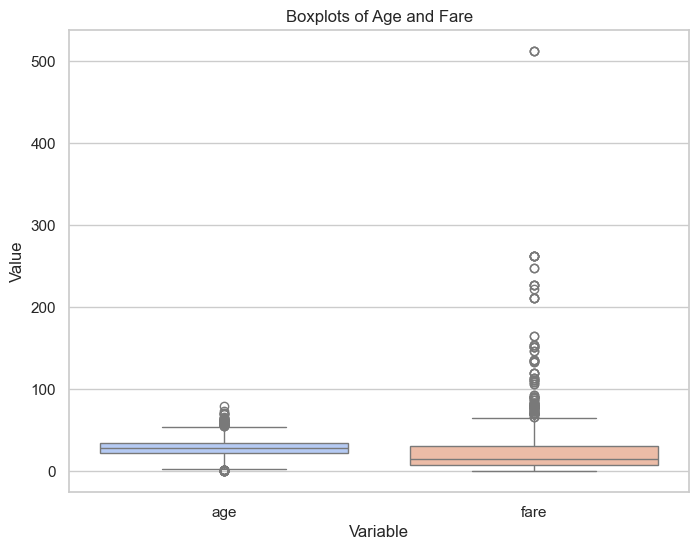

In [55]:
cols = ['age', 'fare']
df_melted = pd.melt(df_cleaned[cols])

plt.figure(figsize=(8, 6))
sns.boxplot(x='variable', y='value', data=df_melted, hue='variable', palette='coolwarm', legend=False)
plt.title("Boxplots of Age and Fare")
plt.xlabel("Variable")
plt.ylabel("Value")
plt.show()

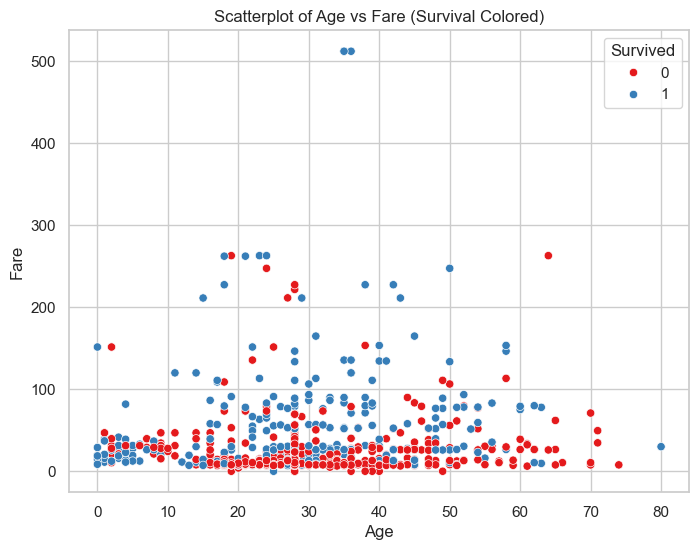

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=df_cleaned, palette='Set1')
plt.title("Scatterplot of Age vs Fare (Survival Colored)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()


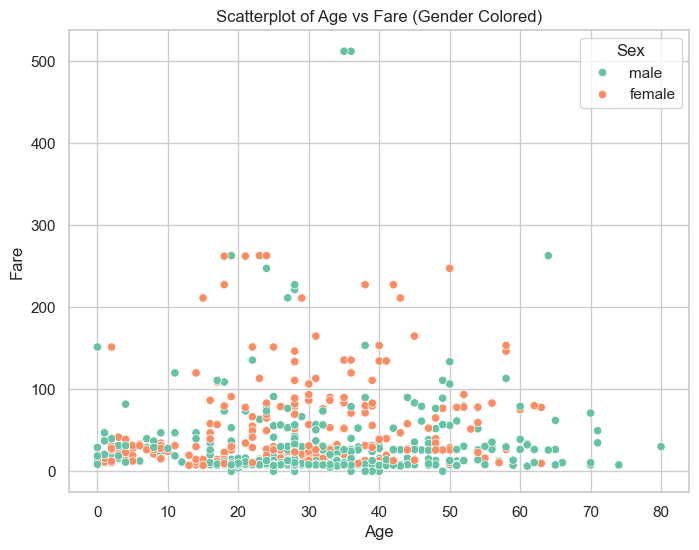

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', hue='sex', data=df_cleaned, palette='Set2')
plt.title("Scatterplot of Age vs Fare (Gender Colored)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Sex")
plt.show()

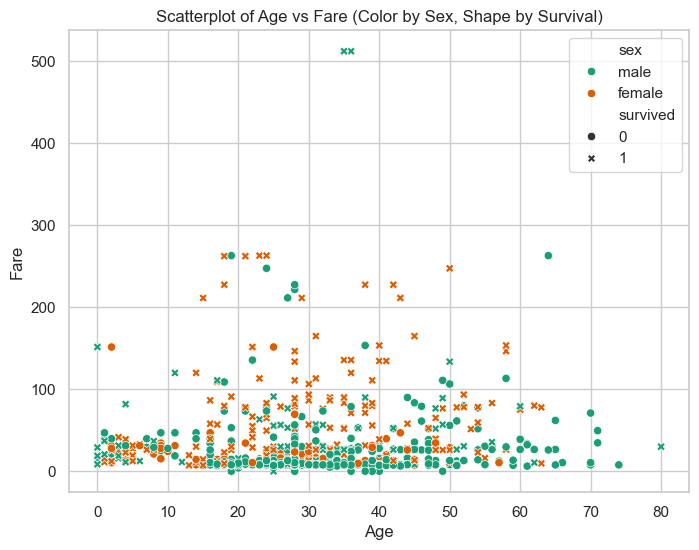

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', hue='sex', style='survived', data=df_cleaned, palette='Dark2')
plt.title("Scatterplot of Age vs Fare (Color by Sex, Shape by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


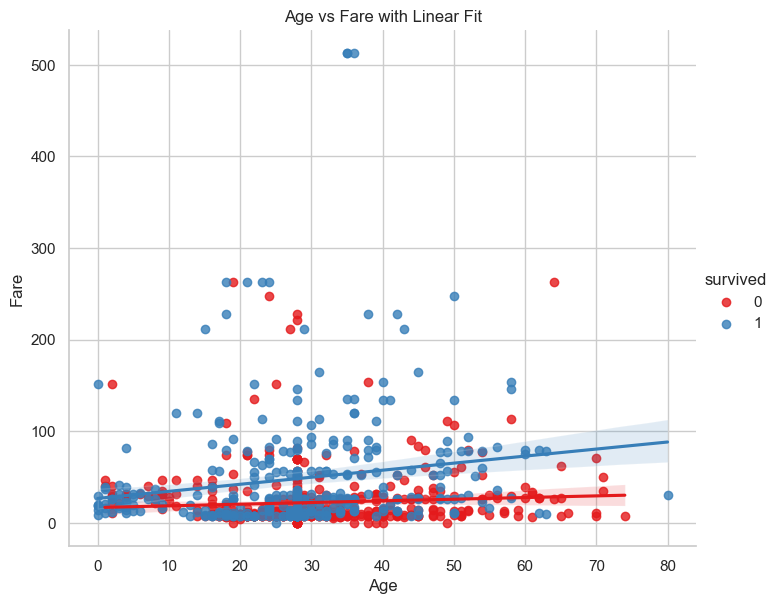

In [59]:
sns.lmplot(x='age', y='fare', hue='survived', data=df_cleaned, palette='Set1', height=6, aspect=1.2)
plt.title("Age vs Fare with Linear Fit")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


<Axes: xlabel='survived', ylabel='age'>

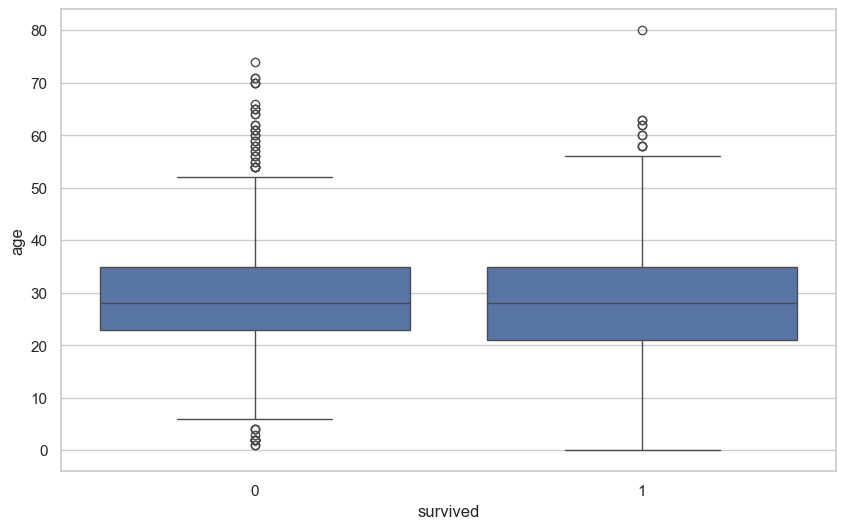

In [60]:
sns.boxplot(x='survived', y='age', data=df_cleaned)


<Axes: xlabel='pclass', ylabel='fare'>

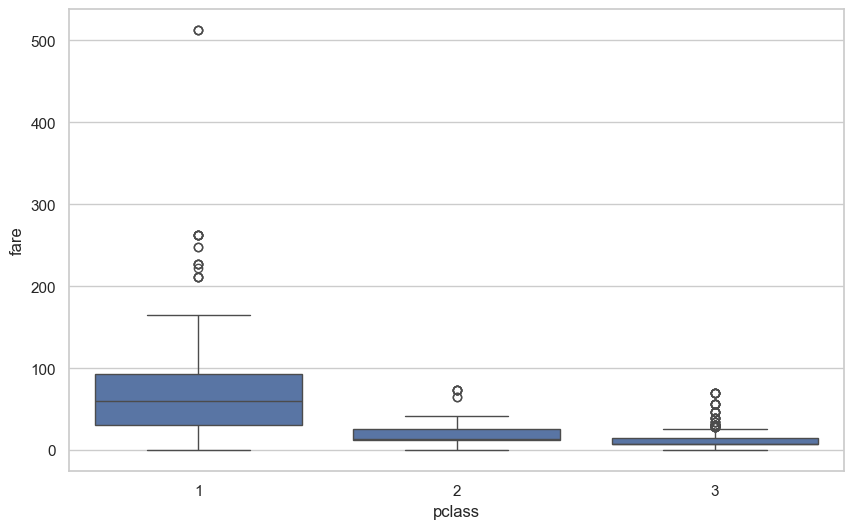

In [61]:
sns.boxplot(x='pclass', y='fare', data=df_cleaned)


<Axes: xlabel='sex', ylabel='age'>

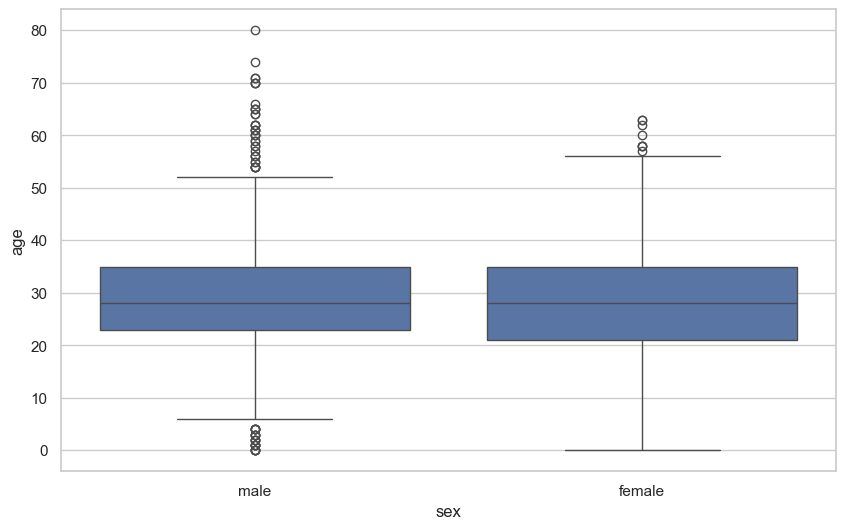

In [62]:
sns.boxplot(x='sex', y='age', data=df_cleaned)


<Axes: xlabel='age', ylabel='fare'>

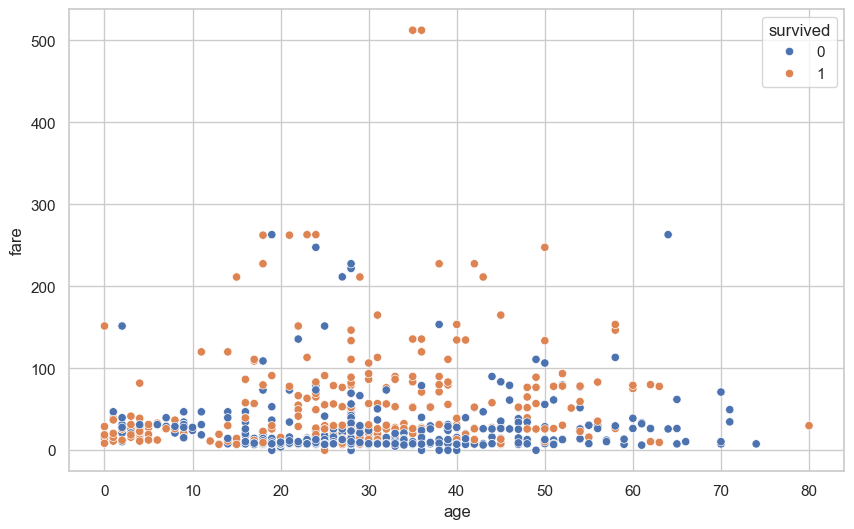

In [63]:
sns.scatterplot(x='age', y='fare', hue='survived', data=df_cleaned)


<Axes: xlabel='age', ylabel='fare'>

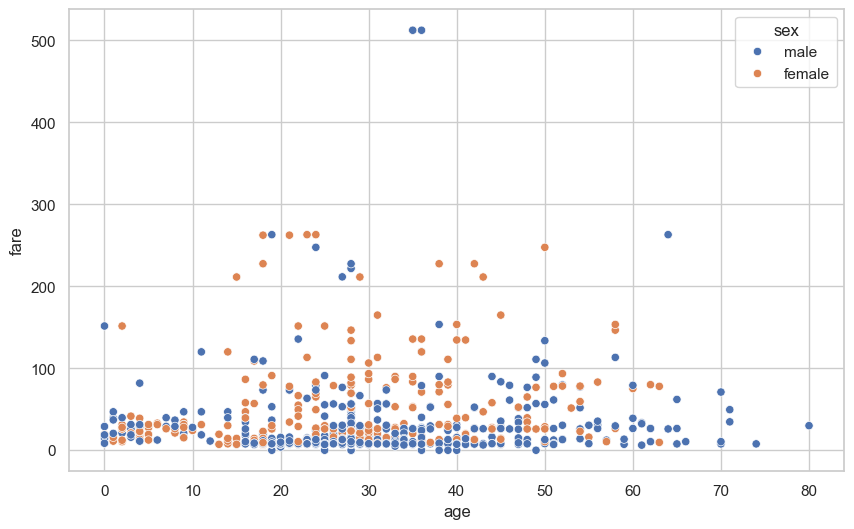

In [64]:
sns.scatterplot(x='age', y='fare', hue='sex', data=df_cleaned)


<Axes: xlabel='age', ylabel='fare'>

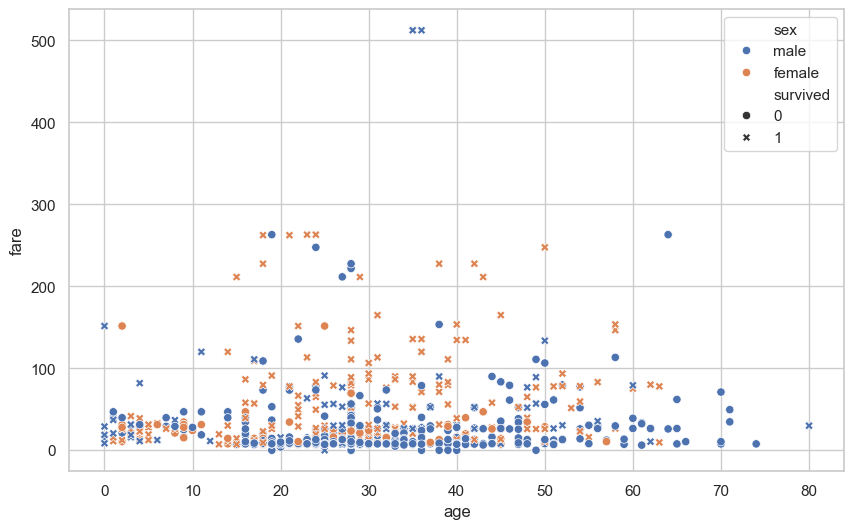

In [65]:
sns.scatterplot(x='age', y='fare', hue='sex', style='survived', data=df_cleaned)


<Axes: >

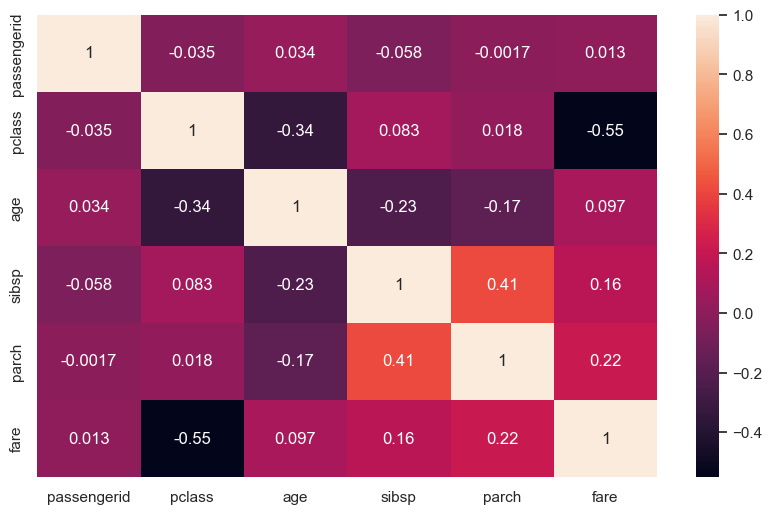

In [66]:
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True)


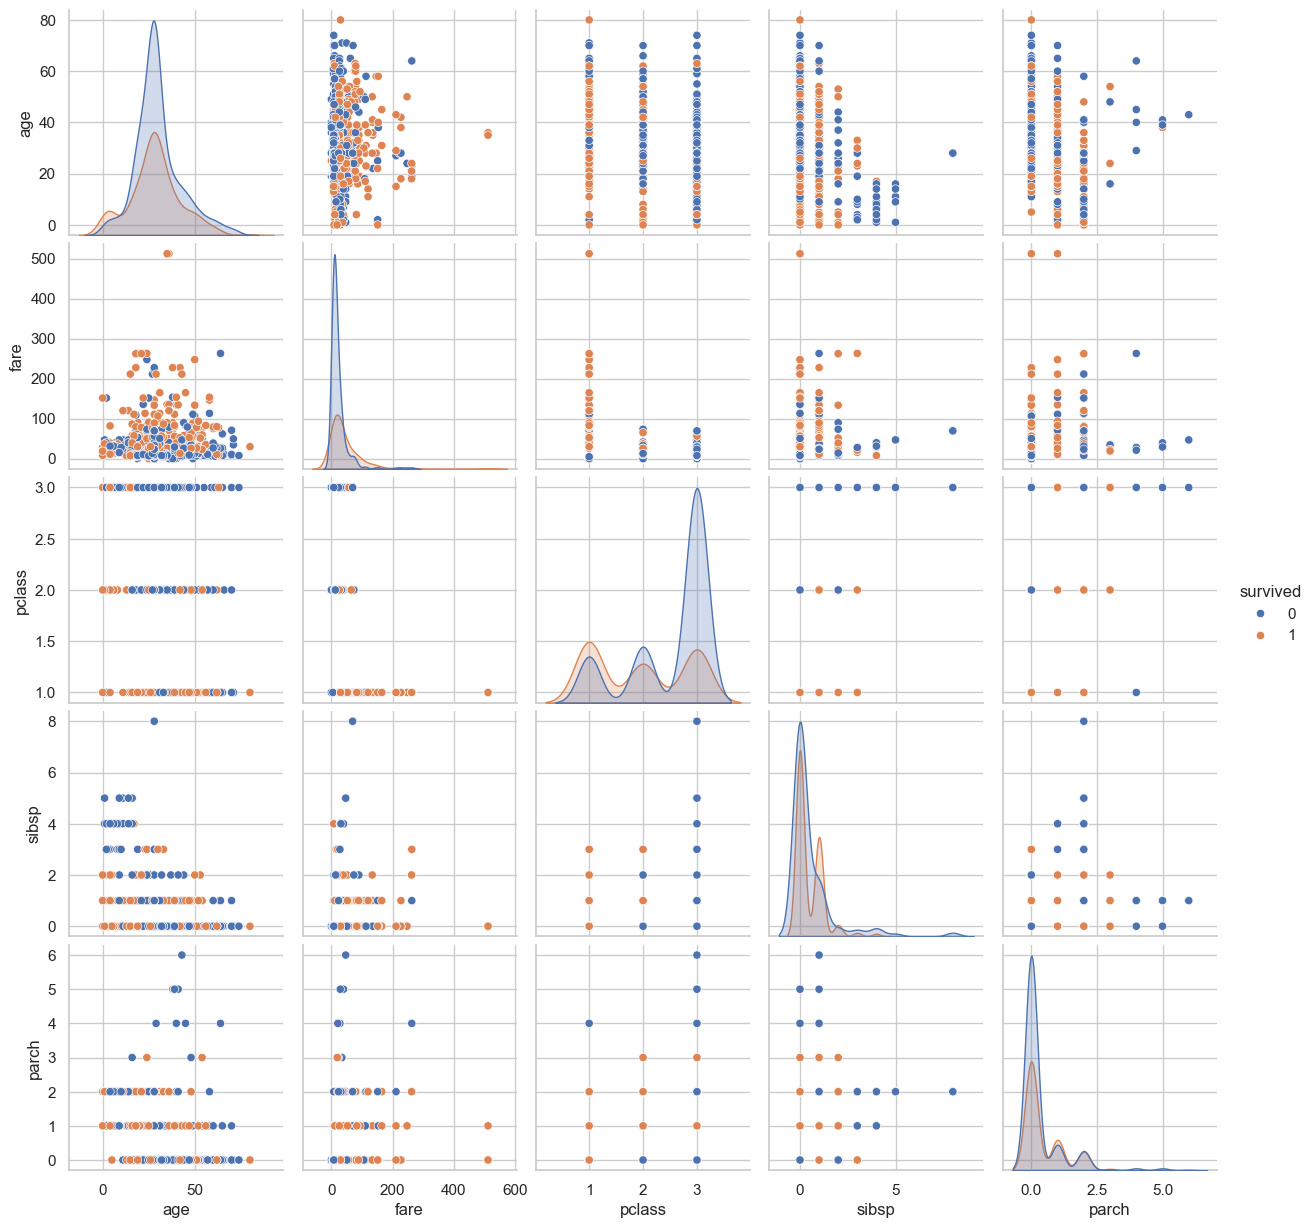

In [68]:
sns.pairplot(df_cleaned[pairplot_columns], hue='survived')
